In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy import stats
%matplotlib inline

[1.0614182  1.27457467 1.39974304 1.25433865 1.22367255 1.18174134
 1.5369497  1.48519452 1.37321566 0.908301   1.247859   1.45623121
 1.27931893 1.10291868 1.37040696 1.33501113 1.37566177 1.3173362
 1.46169457 1.38197057 1.05977032 1.36164196 0.99810109 1.24587931
 1.22736281 0.98313545 1.30318567 1.14277867 1.61217932 1.28844932]


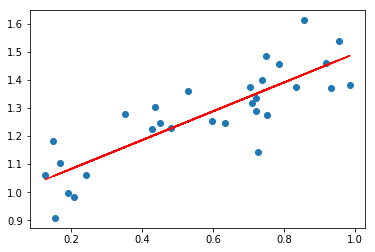

coefficients: m: 0.5129693875499236 b: 0.9806431832493352
r-squared: 0.7023345106724491


In [2]:
N = 30
beta_0 = 1
beta_1 = 0.5
#np.random.seed(18)
X = np.random.rand(N)
#X_2 = np.random.rand(N)
mu = np.random.normal(0, 0.1, N)
Y = beta_0 + (beta_1 * X) + mu

print(Y)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

plt.plot(X, Y, 'o', label='original data')
plt.plot(X, intercept + slope*X, 'r', label='fitted line')
plt.legend
plt.show()

print('coefficients: ' + 'm: ' + str(slope) + ' ' + 'b: ' + str(intercept))
print("r-squared:", r_value**2)

In [3]:
def model(N, beta_0, beta_1):
    X = np.random.rand(N)
    mu = np.random.normal(0, 0.1, N)
    Y = beta_0 + (beta_1 * X) + mu
    slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
    return slope, intercept


coef = []  
for i in range(100):
    coef.append(model(30, 1, 0.5))
    
coef = np.array(coef)
m_ave = np.mean(coef[:,0])
m_std = np.std(coef[:,0])
b_ave = np.mean(coef[:,1])
b_std = np.std(coef[:,1])


print(m_ave)
print(m_std)
print(b_ave)
print(b_std)
    

0.502926491544546
0.058266984677320104
0.9986071613966533
0.03701990239997631


In [4]:
import pandas as pd

auto_data = pd.read_csv('/Users/patrickcullinane/Desktop/auto.csv')

auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


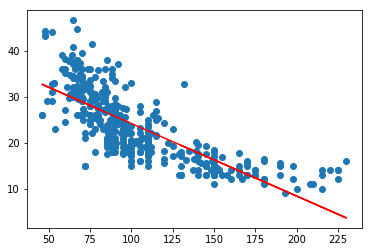

coefficients: m: -0.15784473335365362 b: 39.93586102117047
r-squared: 0.6059482578894346


In [5]:
#used scipy stats for this

X_hp = auto_data['horsepower']
Y_mpg = auto_data['mpg']

slope, intercept, r_value, p_value, std_err = stats.linregress(X_hp, Y_mpg)

plt.plot(X_hp, Y_mpg, 'o', label='original data')
plt.plot(X_hp, intercept + slope*X_hp, 'r', label='fitted line')
plt.legend
plt.show()

print('coefficients: ' + 'm: ' + str(slope) + ' ' + 'b: ' + str(intercept))
print("r-squared:", r_value**2)

*I deleted the horsepower data with a question mark

(a) The coefficients just show that the y-intercept is at approx. y=39 & that the slope is gradually negative. Thus as horse power increases MPG generally decreases.

(b) Using r^2 it appears that the data is somewhat correlated. Intuitively one can expect MPG to decrease as engine performance increases as there may be a trade off between efficiency and performance.

(c) the formula of the model is: f(x) = -0.158(x) + 39.936

(d) the predicted MPG with a horsepower of 98 would be: -0.158(98) + 39.936 =  = 24.452 MPG

(e) see graph(s)



In [6]:
#used sklearn for as a double check

from sklearn import linear_model
ols = linear_model.LinearRegression()

In [12]:
ols.fit(X_hp.reshape(-1,1), Y_mpg)
print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.3f" %ols.intercept_)
print('r^2: %.3f' %ols.score(X_hp.reshape(-1,1), Y_mpg))

beta_1: -0.158
beta_0: 39.936
r^2: 0.606


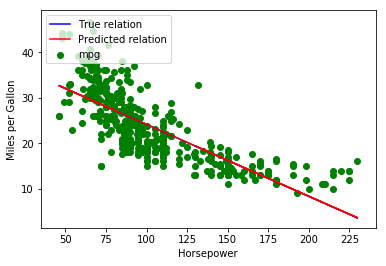

In [13]:
beta_1 = -0.158
beta_0 = 39.936

X_hp = X_hp.reshape(-1,1)

plt.plot(X_hp, beta_0 + beta_1*X_hp, c='b', lw=1.5, label='True relation')
plt.plot(X_hp, ols.predict(X_hp), c='r', lw=1.5, label='Predicted relation')
plt.scatter(X_hp, Y_mpg, color='green')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.legend(loc=2)

In [30]:
X = auto_data['horsepower']
Y = auto_data['mpg']

#calculate slope
r = stats.pearsonr(X,Y)[0]
m = r*(np.std(Y)/np.std(X))

#calculate intercept
b = np.mean(Y) - (m * np.mean(X))
print("beta_0: %.3f" %m)
print("beta_1: %.3f" %b)


beta_0: -0.158
beta_1: 39.936


In [141]:
#question 4
#importing some sleep data from an app I use to track my quality of sleep
sleepdata = pd.read_excel('/Users/patrickcullinane/Desktop/sleeptime.xlsx')
sleepdata.head()

,time in bed,sleep quality
0,6.79,0.80
1,7.70,0.89
2,6.75,0.73
3,8.04,0.75
4,5.29,0.46


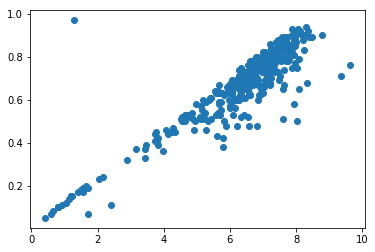

In [142]:
X_time = sleepdata['time in bed']
Y_quality = sleepdata['sleep quality']

plt.plot(X_time, Y_quality, 'o', label='original data')

In [144]:
ols.fit(X_time.values.reshape(-1,1), Y_quality)
print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.3f" %ols.intercept_)
print('r^2: %.3f' %ols.score(X_time.values.reshape(-1,1), Y_quality))

beta_1: 0.100
beta_0: 0.035
r^2: 0.821


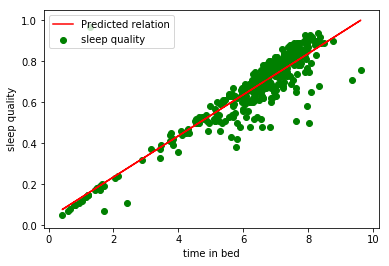

In [150]:
beta_0 = 0.035
beta_1 = 0.100

#plt.plot(X_time, beta_0 + beta_1*X_time, c='b', lw=1.5, label='')
plt.plot(X_time, ols.predict(X_time.values.reshape(-1,1)), c='r', lw=1.5, label='Predicted relation')
plt.scatter(X_time, Y_quality, color='green')
plt.xlabel('time in bed')
plt.ylabel('sleep quality')
plt.legend(loc=2)